In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('agricultural_data_full.csv')

In [24]:
df.columns

Index(['Hectares', 'Seedrate(in Kg)', 'LP_Mainfield(in Tonnes)',
       'Nursery area (Cents)', 'LP_nurseryarea(in Tonnes)', 'DAP_20days',
       'Weed28D_thiobencarb', 'Urea_40Days', 'Potassh_50Days',
       'Micronutrients_70Days', 'Pest_60Day(in ml)', '30DRain( in mm)',
       '30DAI(in mm)', '30_50DRain( in mm)', '30_50DAI(in mm)',
       '51_70DRain(in mm)', '51_70AI(in mm)', '71_105DRain(in mm)',
       '71_105DAI(in mm)', 'Min temp_D1_D30', 'Max temp_D1_D30',
       'Min temp_D31_D60', 'Max temp_D31_D60', 'Min temp_D61_D90',
       'Max temp_D61_D90', 'Min temp_D91_D120', 'Max temp_D91_D120',
       'Inst Wind Speed_D1_D30(in Knots)', 'Inst Wind Speed_D31_D60(in Knots)',
       'Inst Wind Speed_D61_D90(in Knots)',
       'Inst Wind Speed_D91_D120(in Knots)', 'Relative Humidity_D1_D30',
       'Relative Humidity_D31_D60', 'Relative Humidity_D61_D90',
       'Relative Humidity_D91_D120', 'Trash(in bundles)', 'Paddy yield(in Kg)',
       'Agriblock_Chinnasalem', 'Agriblock_Cuddalor

In [25]:
df["LP_Mainfield(in Tonnes)"]

0       75.0
1       75.0
2       75.0
3       75.0
4       75.0
        ... 
2784    12.5
2785    12.5
2786    12.5
2787    12.5
2788    12.5
Name: LP_Mainfield(in Tonnes), Length: 2789, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target variable
target = 'LP_Mainfield(in Tonnes)'

# Create X (features) and y (target) for the Full dataset
X_full = df.drop(columns=[target])
y_full = df[target]


In [27]:
# Split the Full dataset
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_f_scaled = scaler.fit_transform(X_train_f)
X_test_f_scaled = scaler.transform(X_test_f)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_traditional_regression_mlp(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu'), 
        layers.Dense(16, activation='relu'),
        # No activation here so it can output any continuous number (Tonnes)
        layers.Dense(1) 
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse', # Mean Squared Error for regression
        metrics=['mae'] # Mean Absolute Error (average error in tonnes)
    )
    return model

# **Initializing the Model**

In [29]:
# The number of columns in your scaled data is the input shape
input_dim = X_train_f_scaled.shape[1]

# Build the model using your function
traditional_model = build_traditional_regression_mlp(input_dim)

# Print the summary to see the total number of "weights" (trainable parameters)
traditional_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,665 (22.13 KB)

 Trainable params: 5,665 (22.13 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = traditional_model.fit(
    X_train_f_scaled, y_train_f,
    epochs=50,             # Number of times to go through the data
    batch_size=32,         # How many rows to look at before updating weights
    validation_split=0.2,  # Use 20% of training data for a "practice test"
    verbose=1
)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2190.1614 - mae: 43.2141 - val_loss: 1709.8729 - val_mae: 37.4602
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1001.2456 - mae: 27.7085 - val_loss: 247.0526 - val_mae: 13.2276
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.5683 - mae: 5.1901 - val_loss: 8.7863 - val_mae: 2.3075
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3841 - mae: 1.9531 - val_loss: 5.4400 - val_mae: 1.7873
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3057 - mae: 1.5799 - val_loss: 3.9391 - val_mae: 1.5091
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0489 - mae: 1.3184 - val_loss: 2.8342 - val_mae: 1.2946
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1535 - mae: 1.1004 - val_loss: 1.9960 - val_mae: 1.0798
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4847 - mae: 0.9186 - val_loss: 1.3816 - val_mae: 0.8903
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

Since we are running this on the df_full dataset (which still contains all those 1.00 correlated features), this is our "Messy Baseline." Traditional Multilayer Perceptrons (MLPs) often achieve low error on training data when given redundant features, but they can struggle to explain why they made a specific prediction.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# 1. Get predictions from the MLP model
y_pred_f = traditional_model.predict(X_test_f_scaled)

# 2. Calculate key metrics
mse = mean_squared_error(y_test_f, y_pred_f)
mae = mean_absolute_error(y_test_f, y_pred_f)
r2 = r2_score(y_test_f, y_pred_f)

# 3. Display as a table
metrics_data = {
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Value': [f"{mse:.4f}", f"{mae:.4f}", f"{r2:.4f}"]
}

metrics_df = pd.DataFrame(metrics_data)
print("--- MLP Baseline Performance (Full Dataset) ---")
print(metrics_df.to_string(index=False))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
--- MLP Baseline Performance (Full Dataset) ---
                   Metric  Value
 Mean Squared Error (MSE) 0.0326
Mean Absolute Error (MAE) 0.1417
           R-squared (R2) 0.9999


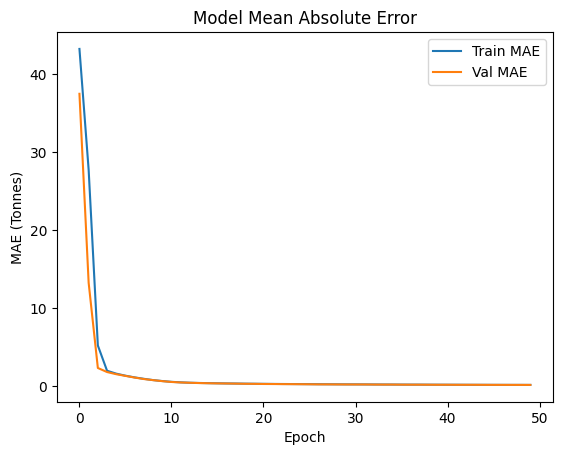

In [32]:
import matplotlib.pyplot as plt

# Plotting the training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE (Tonnes)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **Running same model on reduced dataset**

In [33]:
df_reduced = pd.read_csv('agricultural_data_reduced.csv')

df_reduced.columns


Index(['Hectares', 'LP_Mainfield(in Tonnes)', '30DRain( in mm)',
       'Min temp_D1_D30', 'Max temp_D1_D30', 'Min temp_D31_D60',
       'Max temp_D31_D60', 'Max temp_D61_D90', 'Min temp_D91_D120',
       'Inst Wind Speed_D1_D30(in Knots)', 'Inst Wind Speed_D61_D90(in Knots)',
       'Inst Wind Speed_D91_D120(in Knots)', 'Relative Humidity_D31_D60',
       'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120',
       'Agriblock_Chinnasalem', 'Agriblock_Cuddalore',
       'Agriblock_Kallakurichi', 'Agriblock_Kurinjipadi', 'Agriblock_Panruti',
       'Agriblock_Sankarapuram', 'Variety_CO_43', 'Variety_delux ponni',
       'Variety_ponmani', 'Soil Types_alluvial', 'Soil Types_clay',
       'Nursery_dry', 'Nursery_wet', 'Wind Direction_D1_D30_E',
       'Wind Direction_D1_D30_ENE', 'Wind Direction_D1_D30_NW',
       'Wind Direction_D1_D30_SSE', 'Wind Direction_D1_D30_SW',
       'Wind Direction_D1_D30_W', 'Wind Direction_D31_D60_ENE',
       'Wind Direction_D31_D60_NE', 'Wind Direction

In [34]:
df_reduced["LP_Mainfield(in Tonnes)"]

0       75.0
1       75.0
2       75.0
3       75.0
4       75.0
        ... 
2784    12.5
2785    12.5
2786    12.5
2787    12.5
2788    12.5
Name: LP_Mainfield(in Tonnes), Length: 2789, dtype: float64

In [35]:
# Define the target variable
target = 'LP_Mainfield(in Tonnes)'

# Create X (features) and y (target) for the Full dataset
X_reduced = df_reduced.drop(columns=[target])
y_reduced = df_reduced[target]

In [36]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_f_scaled = scaler.fit_transform(X_train_f)
X_test_f_scaled = scaler.transform(X_test_f)

In [37]:
input_dim = X_train_f_scaled.shape[1]

# Build the model using your function
traditional_model = build_traditional_regression_mlp(input_dim)

# Print the summary to see the total number of "weights" (trainable parameters)
traditional_model.summary()

# Train the model
history = traditional_model.fit(
    X_train_f_scaled, y_train_f,
    epochs=50,             # Number of times to go through the data
    batch_size=32,         # How many rows to look at before updating weights
    validation_split=0.2,  # Use 20% of training data for a "practice test"
    verbose=1
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,257 (16.63 KB)

 Trainable params: 4,257 (16.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2283.5137 - mae: 44.2314 - val_loss: 1893.9691 - val_mae: 39.5173
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1432.0242 - mae: 33.3987 - val_loss: 737.4210 - val_mae: 23.1786
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 387.4594 - mae: 16.3070 - val_loss: 235.4653 - val_mae: 12.7782
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.0944 - mae: 11.7775 - val_loss: 182.6859 - val_mae: 11.3349
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.3872 - mae: 10.5658 - val_loss: 143.9124 - val_mae: 9.8833
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.7822 - mae: 9.0967 - val_loss: 104.5937 - val_mae: 8.4981
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.6731 - mae: 7.5818 - val_loss: 67.5530 - val_mae: 6.7212
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.9878 - mae: 5.7997 - val_loss: 36.7081 - val_mae: 4.9295
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━

In [38]:
# 1. Get predictions from the MLP model
y_pred_f = traditional_model.predict(X_test_f_scaled)

# 2. Calculate key metrics
mse = mean_squared_error(y_test_f, y_pred_f)
mae = mean_absolute_error(y_test_f, y_pred_f)
r2 = r2_score(y_test_f, y_pred_f)

# 3. Display as a table
metrics_data = {
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Value': [f"{mse:.4f}", f"{mae:.4f}", f"{r2:.4f}"]
}

metrics_df = pd.DataFrame(metrics_data)
print("--- MLP Baseline Performance (Full Dataset) ---")
print(metrics_df.to_string(index=False))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
--- MLP Baseline Performance (Full Dataset) ---
                   Metric  Value
 Mean Squared Error (MSE) 0.0405
Mean Absolute Error (MAE) 0.1509
           R-squared (R2) 0.9999


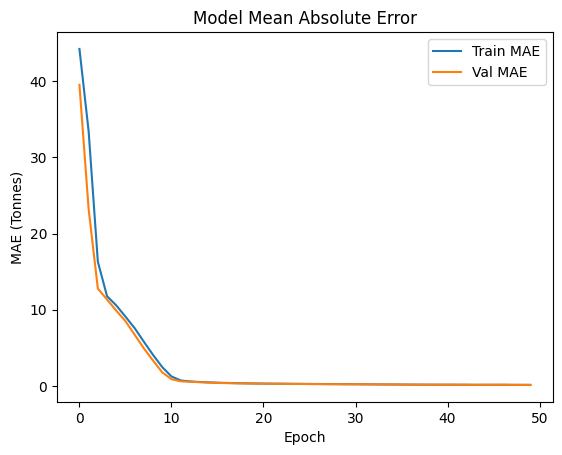

In [39]:
# Plotting the training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE (Tonnes)')
plt.xlabel('Epoch')
plt.legend()
plt.show()